In [3]:
#import all the necessay libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read CSV
dataset=pd.read_csv('Mall_Customers.csv')

In [5]:
#Print a few rows of the dataset
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Creating dummies for categorical values
dataset=pd.get_dummies(dataset, dtype=int)

In [7]:
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


<Axes: >

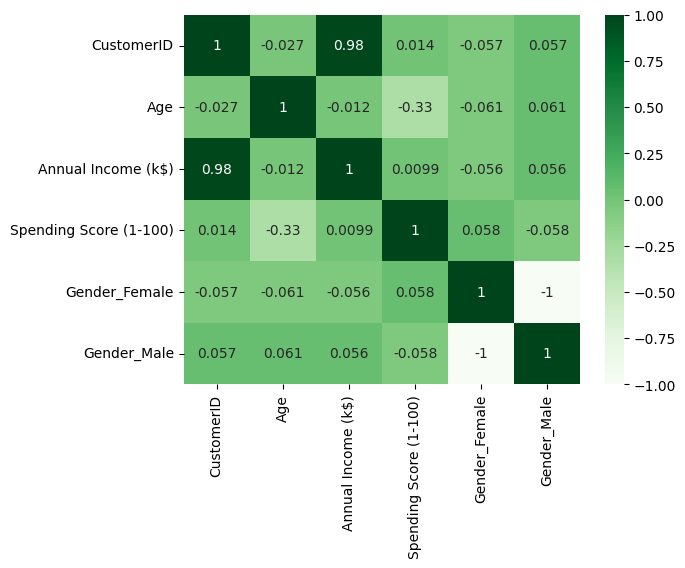

In [8]:
# Correlation Matrix
matrix = dataset.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [9]:
# Considering Age, Annual Income and Spending Score as the input to the model
X=dataset.iloc[:,1:4].values

In [10]:
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

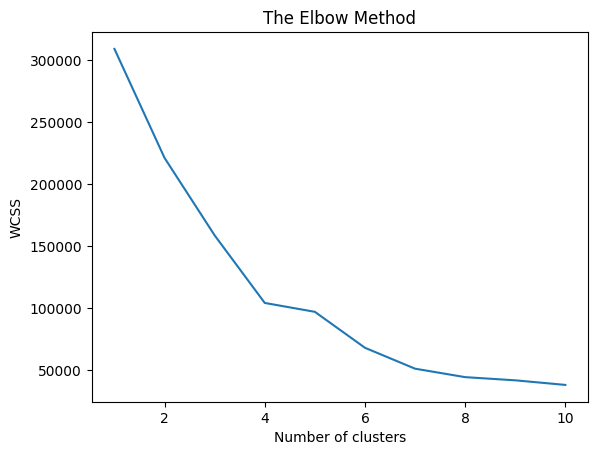

In [11]:
#Optimum clusers using Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#Initializing Clustering
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Cluster 1 has 44 data points.
Cluster 2 has 7 data points.
Cluster 3 has 23 data points.
Cluster 4 has 34 data points.
Cluster 5 has 32 data points.
Cluster 6 has 22 data points.
Cluster 7 has 38 data points.


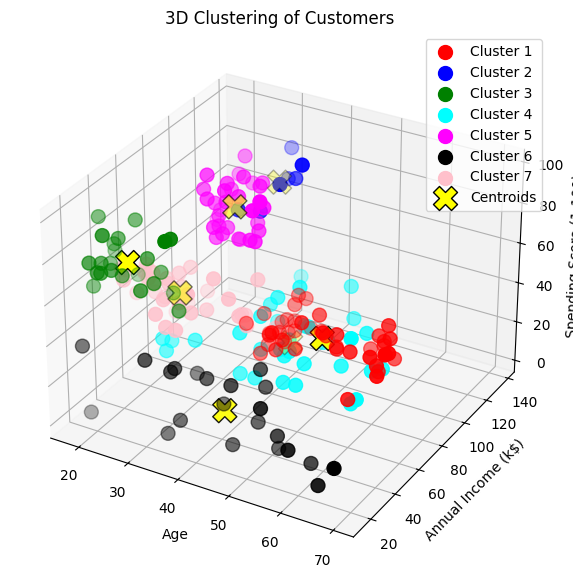

In [13]:
# Print Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'black', 'pink']

# Scatter plot for clusters
for cluster in range(7):
    ax.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], X[y_kmeans == cluster, 2],
               s=100, c=colors[cluster], label=f'Cluster {cluster+1}')
    print(f"Cluster {cluster+1} has {np.sum(y_kmeans == cluster)} data points.")

# Plot centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='yellow', edgecolors='black', marker='X', label='Centroids')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Clustering of Customers')

# Legend and show plot
plt.legend()
plt.show()



In [14]:
#Mean values for the cluster
for cluster in range(7):  # Assuming 7 clusters
    cluster_data = X[y_kmeans == cluster]
    mean_age = np.mean(cluster_data[:, 0])  # x-axis = Annual Income
    mean_income = np.mean(cluster_data[:, 1])  # Y-axis = Annual Income
    mean_spending = np.mean(cluster_data[:, 2])  # Z-axis = Spending Score
    age_range = (np.min(cluster_data[:, 0]), np.max(cluster_data[:, 0]))
    income_range = (np.min(cluster_data[:, 1]), np.max(cluster_data[:, 1]))
    spending_range = (np.min(cluster_data[:, 2]), np.max(cluster_data[:, 2]))

    print(f"Cluster {cluster+1}:Mean Age= {mean_age:.2f}, Range={age_range}, Income = {mean_income:.2f}k, Range = {income_range}, "
          f"Mean Spending Score = {mean_spending:.2f}, Range = {spending_range}")


Cluster 1:Mean Age= 56.34, Range=(43, 70), Income = 53.70k, Range = (38, 67), Mean Spending Score = 49.39, Range = (35, 60)
Cluster 2:Mean Age= 33.00, Range=(28, 38), Income = 114.71k, Range = (101, 137), Mean Spending Score = 78.43, Range = (68, 91)
Cluster 3:Mean Age= 25.52, Range=(18, 35), Income = 26.30k, Range = (15, 39), Mean Spending Score = 78.57, Range = (61, 99)
Cluster 4:Mean Age= 41.65, Range=(19, 59), Income = 88.74k, Range = (71, 137), Mean Spending Score = 16.76, Range = (1, 39)
Cluster 5:Mean Age= 32.62, Range=(27, 40), Income = 80.38k, Range = (69, 99), Mean Spending Score = 82.94, Range = (63, 97)
Cluster 6:Mean Age= 44.32, Range=(19, 67), Income = 25.77k, Range = (15, 39), Mean Spending Score = 20.27, Range = (3, 40)
Cluster 7:Mean Age= 27.32, Range=(18, 43), Income = 57.50k, Range = (40, 76), Mean Spending Score = 48.45, Range = (29, 60)


Business Strategy

1. Affluent Luxury Buyers (Cluster 2 - Blue)
Age: Young professionals (28–38 years old).
Income: Very high ($101k–$137k).
Spending Score: High (79.00) – Spend on premium products/services.
Behavior: Wealthy and status-driven, likely shop for luxury brands, travel, and high-end services.
Business Strategy:
✔ Offer VIP memberships, luxury branding, exclusive experiences.
✔ Premium product positioning with limited edition launches.
✔ Focus on brand loyalty over discounts (e.g., exclusive rewards).

2. Impulse Buyers with Low Income (Cluster 3 - Green)
Age: Young (18–35 years old).
Income: Low ($15k–$39k).
Spending Score: Very High (78.00) – Spend beyond financial capacity.
Behavior: Likely spend emotionally, influenced by social trends and discounts.
Business Strategy:
✔ Offer Buy Now, Pay Later (BNPL), discounts, and flexible payment options.
✔ Target with trendy, limited-time promotions & influencer marketing.
✔ Use cashback incentives and gamified shopping experiences.

3. Upper-Middle-Class Enthusiastic Shoppers (Cluster 5 - Magenta)
Age: Mid-age professionals (27–40 years old).
Income: High ($69k–$99k).
Spending Score: Very High (82.00) – Heavy spenders.
Behavior: Aspirational buyers, brand-conscious, experience-driven.
Business Strategy:
✔ Offer premium brands with aspirational storytelling.
✔ Provide tiered loyalty rewards & personalized recommendations.
✔ Focus on experience-driven marketing (events, community engagement).

4. Wealthy but Cautious Spenders (Cluster 4 - Cyan)
Age: Mature (19–59 years old).
Income: High ($71k–$137k).
Spending Score: Low (16.76) – Save rather than spend.
Behavior: Likely focused on investments, savings, long-term value purchases.
Business Strategy:
✔ Promote investment-based purchases (e.g., insurance, real estate, savings-linked offers).
✔ Offer subscription-based value memberships (Costco, Amazon Prime models).
✔ Use long-term ROI messaging rather than impulsive promotions.

5. Budget-Conscious Older Shoppers (Cluster 6 - Black)
Age: Older group (19–67 years old).
Income: Low ($15k–$39k).
Spending Score: Very Low (20.27) – Prioritize savings.
Behavior: Price-sensitive, careful buyers, may focus on essentials.
Business Strategy:
✔ Offer budget-friendly discounts, loyalty programs, and financing options.
✔ Focus on "value for money" and affordability-driven branding.
✔ Provide free shipping, bulk discounts, and installment plans.

6. Middle-Class Balanced Shoppers (Clusters 1 & 7)
Cluster 1: Older (43–70 years old), stable income ($38k–$67k), moderate spending (48.40).
Cluster 7: Younger (18–43 years old), mid-range income ($40k–$76k), balanced spending (49.50).
Behavior: Stable working professionals, family-oriented shopping habits.
Business Strategy:
✔ Provide family-friendly promotions, combo deals, cashback offers.
✔ Target with seasonal discounts, membership rewards.
✔ Focus on brand trust, reliability, and quality assurance.